# Lunar Ascent: From Earth to Moon's Orbit

Jason Vasquez, Ethan Crawford, Dylan Skinner, Dallin Stewart

15-April-2024

# Abstract

We present a simulation of a rocket’s path from Earth's surface to the orbit of the Moon. We model the complex dynamics involved in rocket propulsion, gravitational interactions, and orbital mechanics by leveraging differential equations and numerical methods. Our simulation accurately captures the stages of ascent, including liftoff, trajectory optimization, and orbital insertion. Through detailed analysis and visualization, we explore the critical factors influencing orbital maneuvers required for this orbital trajectory. The results offer valuable insights into the challenges and considerations of space exploration, paving the way for future missions to celestial bodies beyond Earth's orbit.

# Background

Space travel presents a highly relevant and classic optimal control problem, influenced by numerous factors such as drag, fuel consumption, gravitational forces from multiple celestial bodies, and varying mass considerations. Navigating a rocket from Earth's surface to the Moon's orbit requires modeling complex dynamics encompassing rocket propulsion, gravitational interactions, and orbital mechanics. We rely on a set of differential equations and numerical methods to simulate and analyze these dynamics in order to accurately optimize trajectory and orbital insertion.

Understanding and optimizing orbital maneuvers for interplanetary travel have been longstanding challenges in aerospace engineering and space exploration. Previous research has explored various aspects of trajectory optimization, spacecraft propulsion, and orbital transfers to achieve efficient and successful missions beyond Earth's immediate vicinity. Notably, the formulation and solution of optimal control problems have been instrumental in advancing our understanding of spaceflight dynamics and guiding mission planning efforts in order to achieve recent feats such as landing on the moon and Mars.

This study builds upon existing research by focusing on the specific trajectory from Earth's surface to the moon's orbit. By conducting detailed analysis and visualizing critical factors affecting orbital maneuvers, our simulation provides valuable insights into the challenges and considerations of space exploration beyond Earth's orbit. The results obtained pave the way for enhanced mission planning and spacecraft design, contributing to the realization of future missions to celestial bodies throughout the solar system and beyond.


# Mathematical Representation

To solve this problem, we defined a cost functional, a state-space evolution equation, and initial and endpoint conditions. We then utilized Pontryagin’s maximum principle to formulate the co-state evolution equation and solve for the optimal control in terms of the co-state. This allowed us to set up a boundary-value problem to solve for the state and costate and then the control. The code and steps for how we accomplished this is defined below. We made several simplifying assumptions in this project defined below.


Assumptions
1. Rocket, earth, and moon have point mass for the sake of calculating gravity
2. Rocket, earth, and moon are the only objects for the sake of calculating gravity (no influence of the sun, stars, etc)
3. Rocket, earth, and moon lie on a 2D plane
4. Moon's orbit is perfectly circular
5. Rocket's mass does not change
6. Rocket is single stage
7. The earth's position remains at the origin of the 2D plane
8. The moon's position at time zero is on the $x$-axis

Unless otherwise specified, we the units for this project are defined as:
- Mass: kilograms (kg)
- Distance: meters (m)
- Force: newtons (N)
- Angle: degrees (°)
- Speed: meters per second (m/s)
- Time: seconds (s)

## Cost Functional

As mentioned above, we seek to find the optimal thrust for a rocket to leave Earth and begin orbiting the moon. To do so, we set up our cost functional as

\begin{equation*}
    J[\textbf{u}] = \int_{0}^{t_f}c\lVert \textbf{u}(t)\rVert^2 dt,
\end{equation*}

where we can interpret $\textbf{u} = \begin{bmatrix}u_x & u_y\end{bmatrix}$ as the thrust in the $x$- and $y$-directions, respectively. We also define our initial conditions as

$$\begin{aligned}
    x(0) &= R_e, &&x(t_f) = L_m\cos(\theta) + (R_m + h_f)\cos(90 + \varphi) \\
    y(0) &= 0, &&y(t_f) = L_m\sin(\theta) + (R_m + h_f)\sin(90 + \varphi) \\
    x'(0) &= 0, &&x'(t_f) = v_f\cos(\theta) \\
    y'(0) &= \omega_e, &&y'(t_f) = v_f\sin(\theta) \\
\end{aligned}$$

where

- $c$ is the scaling constant for the cost of thrust
- $R_e$ is the radius of the Earth (in kilometers),
- $L_m$ is the distance from the Earth to the moon (in kilometers),
- $R_m$ is the radius of the moon (in kilometers),
- $h_f$ is the desired height above the moon to enter orbit (in kilometers),
- $v_f$ is the final velocity of the rocket (in kilometers per second),
- $\omega_e$ is the angular velocity of the Earth at the equator (in radians per second),
- $\theta$ is the angle between the $x$-axis and the line between the Earth and the moon, assuming the Earth is at the origin (in degrees),
- $\varphi$ is the angle between the $y$-axis and the line between the Earth and the moon.

## State Space

We define our state space equation as 

$$\bar{x} = \begin{bmatrix}x \\ y \\ x' \\ y' \end{bmatrix}$$

where $x''$ and $y''$ are the acceleration in the $x$ and $y$ directions, respectively. Using Newton's second law, this gives:

$$\begin{aligned}
    x'' &= -\frac{G M_e x}{(x^2 + y^2)^{3/2}} \, + \, \frac{GM_m(L_x - x)}{((L_x - x)^2 + (L_y - y)^2)^{3/2}} + \frac{u_x}{m_r} - \frac{\frac{1}{2}cA\rho(x,y)x^{\prime 2}}{m_r} \\
    y'' &= -\frac{GM_e y}{(x^2 + y^2)^{3/2}} \, - \, \frac{GM_m (L_y - y)}{((L_x-x)^2 +(L_y - y)^2)^{3/2}} + \frac{u_y}{m_r} -  \frac{\frac{1}{2}cA\rho(x,y)y^{\prime 2}}{m_r}.
\end{aligned}$$

where

- $G$ is the universal gravitational constant
- $M_e$ is the mass of the Earth
- $M_m$ is the mass of the moon
- $m_r$ is the mass of the rocket
- $u_x$ is the rocket's thrust in the $x$ direction
- $u_y$ is the rocket's thrust in the $y$ direction
- $L_x$ is the $x$ position of the moon
- $L_y$ is the $y$ position of the moon
- $c$ is the drag constant $\frac{1}{4}$
- $a$ is the surface area of the top of the rocket
- $\rho(x,y)$ is the air density at position $(x,y)$

## Hamiltonian

We now derive the Hamiltonian equation. We have

$$\begin{aligned}
    H = \textbf{p}\cdot\textbf{x}' - L &= \begin{bmatrix}p_1 & p_2 & p_3 & p_4 \end{bmatrix}\begin{bmatrix}x' \\ y' \\ x'' \\ y'' \end{bmatrix} - c\lVert \textbf{u} \rVert^2 \\
    &= p_1x' + p_2y' + p_3x'' + p_4y'' - cu_x^2 - cu_y^2.
\end{aligned}$$

Plugging these values into the Hamiltonian equation, we get

$$\begin{aligned}
    H = p_1x' + p_2y' - &p_3\left(-\frac{G M_e x}{(x^2 + y^2)^{3/2}} \, + \, \frac{GM_m(L_x - x)}{((L_x - x)^2 + (L_y - y)^2)^{3/2}} + \frac{u_x}{m_r} - \frac{\frac{1}{2}ca\rho(x,y)x^{\prime 2}}{m_r}\right) \\
    &- p_4\left(-\frac{GM_e y}{(x^2 + y^2)^{3/2}} \, - \, \frac{GM_m (L_y - y)}{((L_x-x)^2 +(L_y - y)^2)^{3/2}} + \frac{u_y}{m_r} -  \frac{\frac{1}{2}ca\rho(x,y)y^{\prime 2}}{m_r}\right) - cu_x^2 - cu_y^2.
\end{aligned}$$

## Co-State Derivatives

We now derive the necessary equations for the PMP. We first derive the necessary equations for the adjoint equations (co-state evolution). We have

$$\begin{aligned}
    \dot{p}_1  = -\frac{\partial H}{\partial x}  
    
    = &-p_3\left(\frac{3GM_m(L_x - x)^2}{\left((L_x - x)^2 + (L_y - y)^2\right)^{5/2}} - \frac{GM_m}{\left((L_x - x)^2 + (L_y - y)^2 \right)^{3/2}} + \frac{3GM_ex^2}{(x^2 + y^2)^{5/2}} - \frac{GM_e}{(x^2+y^2)^{3/2}}\right) \\
    &\;-p_4\left(\frac{-3GM_m(L_x - x)(L_y - y)}{\left((L_x - x)^2 + (L_y - y)^2\right)^{5/2}} + \frac{3GM_e xy}{(x^2 + y^2)^{5/2}} \right) \\
    
    \dot{p}_2 =  -\frac{\partial H}{\partial x} = 
    &-p_3\left(\frac{3GM_m(L_x-x)(L_y - y)}{((L_x-x)^2 + (L_y - y)^2)^{5/2}} + \frac{3GM_exy}{(x^2 + y^2)^{5/2}}\right) \\
    &\;- p_4\left(\frac{-3GM_m(L_y - y)^2}{((L_x-x)^2 + (L_y - y)^2)^{5/2}} + \frac{GM_m}{((L_x-x)^2 + (L_y - y)^2)^{3/2} } + \frac{3GM_ey^2}{(x^2 + y^2)^{5/2}} - \frac{GM_e}{(x^2 + y^2)^{3/2}} \right)  \\
        
    \dot{p}_3 = -\frac{\partial H}{\partial x'} = \;&-p_1 + \frac{c a \rho(x,y)x^{\prime}}{m_r}\\
    \dot{p}_4 = -\frac{\partial H}{\partial y'} = \;&-p_2 + \frac{c a \rho(x,y)y^{\prime}}{m_r}.
\end{aligned}$$

# Code Set Up

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
import matplotlib.image as mpimg

### Constants

The specs for the rocket are from the SpaceX Falcon 9 rocket, taken from space https://www.spacex.com/vehicles/falcon-9/. Other planetary constants taken from http://www.braeunig.us/space/constant.html

In [3]:
# ROCKET
Mr0 = 5.49054e5         # initial mass of rocket
rocket_height = 70      # height of the rocket (not distance from earth)
rocket_diameter = 3.7   # max diameter of rocket
thrust_max1 = 7.56e6    # max thrust of stage 1
thrust_max2 = 9.81e2    # max thrust of stage 2
A = rocket_diameter * np.pi # area that the wind hits

# EARTH
Ve = 0                  # velocity of the earth
Me = 5.97219e24         # mass of the earth
we = 460.0              # angular velocity of the earth at the equator
Re = 6.3781e6           # radius of the earth

# MOON
Vm = 3.683e3            # orbital speed of the moon
Mm = 7.34767309e22      # mass of the moon
wm = 1.67e1             # angular velocity of the moon at its equator
Rm = 1.738e6            # radius of the moon
P = 6.552e2             # period of the orbit of the moon
hf = 1e2                # final distance between rocket and moon
vf = 1e1                # orbital speed of the moon

# SPACE
Lm = 3.84e8             # distance from the earth to the moon
G = 6.673e-11           # graviational constant in (N * m^2) / (kg^2)

# DRAG
p0 = 1.01325e5          # atmospheric pressure at sea level in Pascals
Hn = 1.04e1             # constant for drag force 
K = 1e5                 # Karman line, when drag is zero and space begins at 100 km
c = 0.25                # coefficient of drag for the rocket shape

### Helper Functions

In [69]:
def moon_position(t):
    """
    Calculate the position vector of the Moon at a given time.
    @param t: (float) Time elapsed since the start of the simulation.
    @return: (ndarray) Position vector of the Moon.
    """
    t_norm = t * (2 * np.pi) / P
    return np.array([Lm*np.cos(t_norm), Lm*np.sin(t_norm)])


def rocket_mass(t):
    """
    Calculate the mass of the rocket at a given time.
    @param t: (float) Time elapsed since the start of the simulation.
    @return: (float) Mass of the rocket.
    """
    return Mr0


def density(height):
    """
    Calculate the air density at a given altitude.
    @param height: (float) Altitude above sea level.
    @return: (float) Air density at the given altitude.
    """
    return p0 * np.exp(-height / Hn)


def in_atmosphere(x):
    """
    Calculate if the rocket is in the atmosphere of the Earth.
    @param x: (ndarray) Position vector of the rocket.
    @return: (bool) True if the rocket is in the atmosphere, False otherwise.
    """
    return 1 if np.linalg.norm(x) < K else 0

### Force Functions

In [86]:
def drag(y, x=True):
    """
    Compute the force due to drag from the atmosphere. 
    Returns zero if the rocket has passed the Karman line.

    @param: y (ndarray) - 4D array of floats 
                            x position and y position of the rocket in km, 
                            x velocity and y velocity of the rocket in km/s
    @param: x (boolean) - True if the force should be returned in the x direction, false for the y direction

    @returns: force (float) - Force due to drag in the desired direction
    """
    pos = y[:2]
    vel = y[2:]
    height = np.linalg.norm(pos - Re)
    if height < K:
        i = 0 if x else 1
        return 0.5 * c * A * density(height) * vel[i]**2 / Mr0
    return 0


def drag_derivative(y, x=True):
    """
    Compute the force due to drag from the atmosphere. 
    Returns zero if the rocket has passed the Karman line.

    @param: y (ndarray) - 4D array of floats 
                            x position and y position of the rocket in km, 
                            x velocity and y velocity of the rocket in km/s
    @param: x (boolean) - True if the force should be returned in the x direction, false for the y direction

    @returns: force (float) - Force due to drag in the desired direction
    """
    pos = y[:2]
    vel = y[2:]
    # print(f'pos: {pos}')
    height = np.linalg.norm(pos - Re)  # Why was this minus - Re
    # print(f'c: {c}')
    # print(f'A: {A}')
    # print(f'height: {height}')
    # print(f'dense: {density(height)}')
    # print(f'vel: {vel}')
    # print(f'Mr0: {Mr0}')
    if height < K:
        i = 0 if x else 1
        return c * A * density(height) * vel[i] / Mr0
    return 0


def gravity(x, x_dir=True, moon=None):
    """
    Calculate the magnitude of the gravitational force acting on the rocket.

    @param x: (ndarray) Position vector of the rocket.
    @param x_dir: (bool) True if acceleration in the x direction is desired, False for y.
    @param moon: (ndarray) Position vector of the Moon. Defaults to 0, indicating Earth's gravity.

    @return: (float) Magnitude of the gravitational force.
    """
    if moon is None: moon = np.array([0, 0])
    mass = Me if np.all(moon == 0) else Mm
    id = 0 if x_dir else 1
    # since we want acceleration and not force, we don't multiply by the mass of the rocket
    return G * mass * (moon[id] - x[id]) / ((moon[0] - x[0])**2 + (moon[1] - x[1])**2)**(1.5)

# Solution

In [177]:
n = 1000                # number of time steps to take in the numerical solver
dim = 8                 # dimension of the state and costate spaces, combined
final_time = 250000     # number of seconds to arrive at the moon (approximately 3 days)
cost = 1e-16            # cost scalar for the cost functional

# state update equation
def update(t,z,p):
    # rename variables for readability
    tf = p[0]
    pos = z[:2]
    moon_pos = moon_position(tf)
    Lx, Ly = moon_pos
    mass_r = rocket_mass(tf)
    x = z[0]
    y = z[1]
    p1 = z[4]
    p2 = z[5]
    p3 = z[6]
    p4 = z[7]
    
    # define optimal control based on hamiltonian
    ux = p3 / (2*mass_r) / cost #+ thrust_max1
    uy = p4 / (2*mass_r) / cost #+ thrust_max1

    return np.vstack((z[2], # x prime
                    z[3],   # y prime
                    # x double prime
                    (ux / mass_r - gravity(pos) + gravity(pos, moon=moon_pos) - in_atmosphere(z[:2])*drag(z)), 
                    # y double prime
                    (uy / mass_r - gravity(pos, x_dir=False) - gravity(x, x_dir=False, moon=moon_pos) - in_atmosphere(z[:2])*drag(z, x=False)),
                    # p1 prime
                    -(p4 * ((-3*G*Mm*(Lx-x)*(Ly-y)) / ((Lx-x)**2 + (Ly-y)**2)**(5/2) + 3*G*Me*x*y / (x**2 + y**2)**2.5) + \
                        p3*((3*G*Mm*(Lx-x)**2 / ((Lx-x)**2 + (Ly-y)**2)**(5/2)) - \
                            (G*Mm / ((Lx-x)**2 + (Ly-y)**2)**(3/2)) + \
                                (3*G*Me*x**2 / (x**2 + y**2)**2.5) - \
                                    (G*Me / (x**2 + y**2)**1.5))),
                    # p2 prime
                    -(p3 * ((3*G*Mm*(Lx-x)*(Ly-y)) / ((Lx-x)**2 + (Ly-y)**2)**5/2 + 3*G*Me*x*y / (x**2 + y**2)**2.5) + \
                        p4*((-3*G*Mm*(Ly-y)**2 / ((Lx-x)**2 + (Ly-y)**2)**(5/2)) + \
                            (G*Mm / (((Lx-x)**2 + (Ly-y)**2)**(3/2))) + \
                                (3*G*Me*y**2 / (x**2 + y**2)**2.5) - \
                                    (G*Me / (x**2 + y**2)**1.5))),
                    # p3 prime
                    -(p1 - drag_derivative(z[:4])),
                    # p4 prime
                    -(p2 - drag_derivative(z[:4], x=False))
                    ))

# set up the endpoint conditions
def bc(ya, yb, p):
    tf = p[0]
    moon_pos = moon_position(tf)
    theta = np.arctan2(moon_pos[0], moon_pos[1]) + 90
    return np.array([ya[0]-Re,      # start x
                     ya[1]-0,       # start y
                     ya[2]-0,       # start x'
                     ya[3]-we,      # start y'
                     yb[0]-moon_pos[0] - (Rm-hf)*np.cos(theta),     # end x
                     yb[1]-moon_pos[1] - (Rm-hf)*np.sin(theta),     # end y
                     yb[2]-vf*np.cos(theta),                        # end x'
                     yb[3]-vf*np.sin(theta),                        # end y'
                     (tf-final_time)])       

[2.13262417e+08 3.19335468e+08]
[2.13262417e+08 3.19335468e+08]
[2.13262417e+08 3.19335468e+08]
[-1.47120528e+08  3.54699239e+08]
[-1.47120528e+08  3.54699239e+08]
[-1.47120528e+08  3.54699239e+08]
[-2.71268490e+08 -2.71789268e+08]
[-2.71268490e+08 -2.71789268e+08]


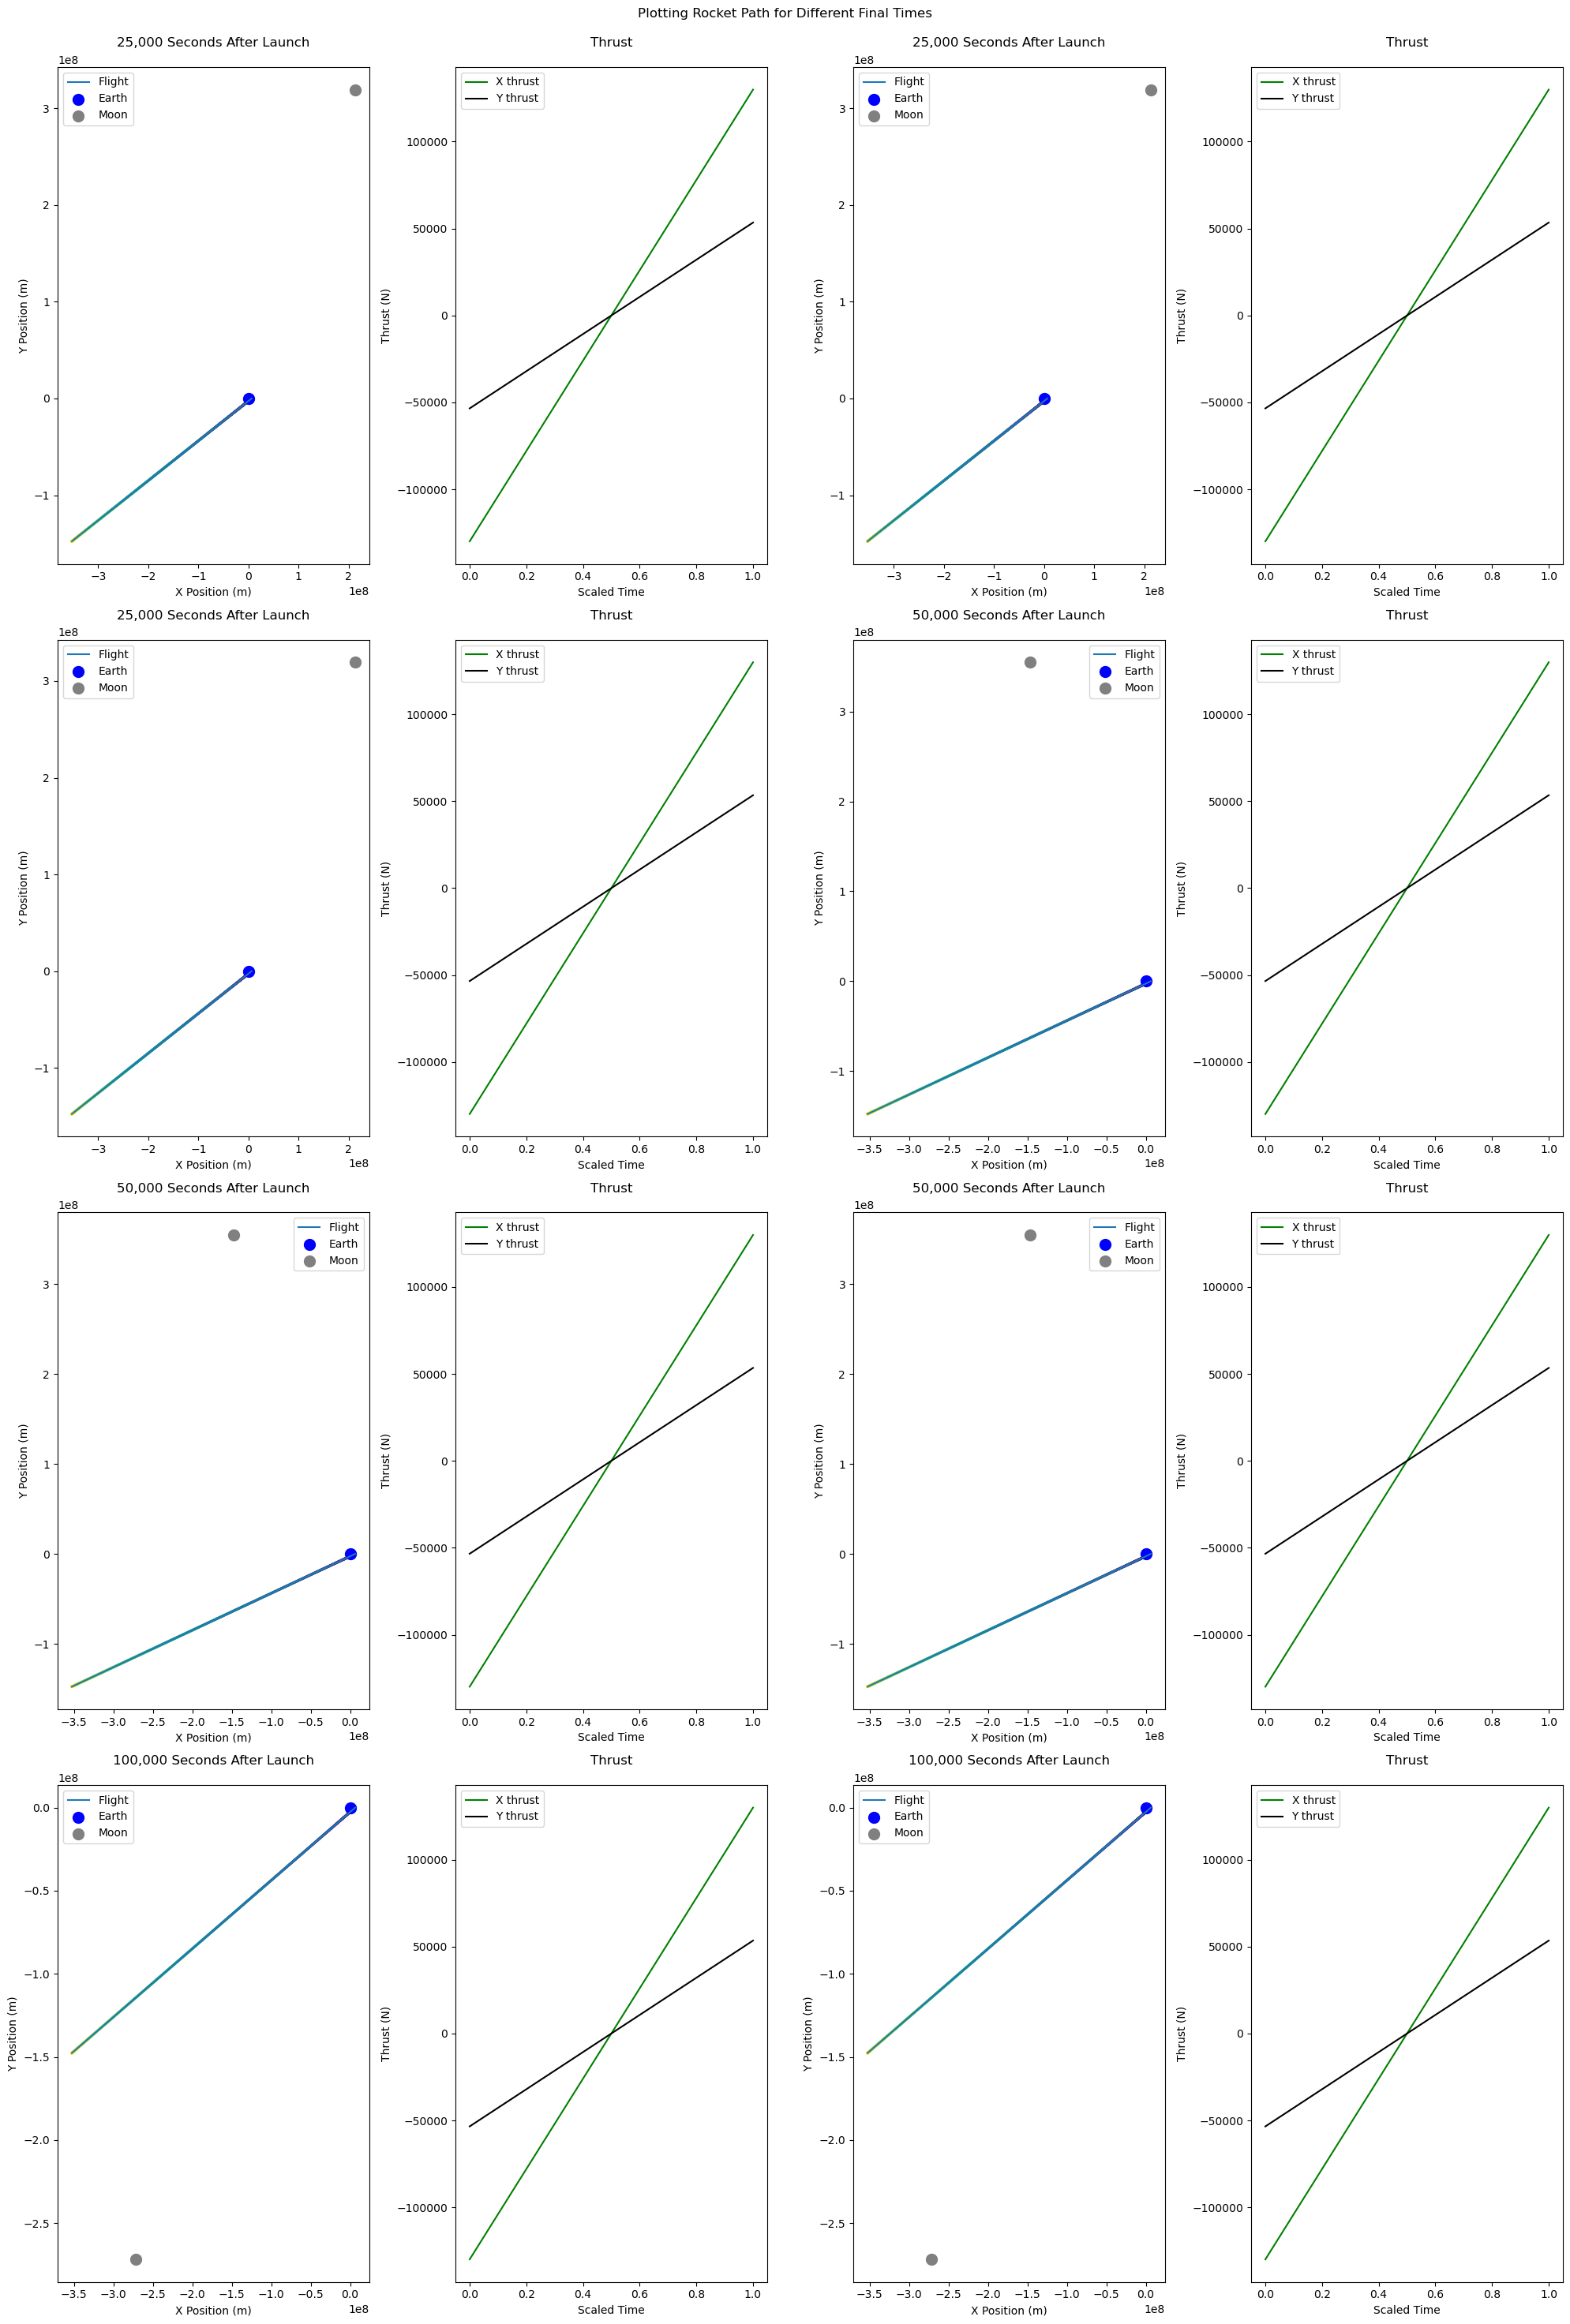

In [180]:
# Plot space as defined in the appendix
plot_space()

# Ferpa Release

We give Dr. Evans, Dr. Whitehead, and other instructors at BYU teaching ACME
classes permission to share our project as an example of a good project in future classes
they teach.

-Jason Vasquez, Dallin Stewart, Dylan Skinner, Ethan Crawford

# Appendix

## Plotting Functions

In [179]:
def plot_space():
    n = 1000
    dim = 8
    r1, r2 = 3, 3
    count = 0
    plt.figure(figsize=(20, 30))
    y_guess = 2
    for i, time_mult in enumerate(np.geomspace(1, 4, num=r1)):
        for j, p_guess in enumerate(np.geomspace(1, 25000, num=r2)):
            final_time = 25000*time_mult
            moon_pos = moon_position(final_time)
            print(moon_pos)
            moon_x, moon_y = moon_pos[0], moon_pos[1]
            print(i, j, end='\r')
            t = np.linspace(0, 1, n)
            y = np.array([np.linspace(Re, moon_x, n), np.linspace(0, moon_y, n) * y_guess, np.ones(n) * y_guess,
                        np.ones(n) * y_guess, np.ones(n) * y_guess, np.ones(n) * y_guess, np.ones(n) * y_guess,
                        np.ones(n) * y_guess])
            # y = np.ones((dim, t.size))
            p0 = np.array([final_time])
            res = solve_bvp(update, bc, t, y, p=p0, max_nodes=50000)

            # plot the results and print out the optimal final time t_f
            t_plot = np.linspace(0, 1, n)
            # print(res.sol(t_plot).shape)
            x_plot = res.sol(t_plot)[0]
            y_plot = res.sol(t_plot)[1]
            px_plot = res.sol(t_plot)[6]
            py_plot = res.sol(t_plot)[7]
            ux_plot = px_plot
            uy_plot = py_plot

            plt.subplot((r2 * r1) // 2, 4, 1 + count)
            plt.plot((x_plot), y_plot, label="Flight")  # Normalize x and y coordinates
            plt.scatter((x_plot), y_plot, cmap="viridis", c=t_plot, s=2)
            plt.scatter(0, 0, c='blue', s=100, label="Earth")
            plt.scatter(moon_x, moon_y, c='gray', s=100, label="Moon")
            plt.xlabel("X Position (m)")
            plt.ylabel("Y Position (m)")
            plt.legend()
            plt.title(f"{final_time:,.0f} Seconds After Launch\n")
            
            plt.subplot((r2 * r1) // 2, 4, 2 + count)
            plt.plot(t_plot, ux_plot, label="X thrust", color='green')
            plt.plot(t_plot, uy_plot, label="Y thrust", color='black')
            plt.xlabel("Scaled Time")
            plt.ylabel('Thrust (N)')
            plt.title(f"Thrust\n")
            plt.legend()
            
            count += 2
            if count >= ((r2 * r1) // 2) * 4:
                break
            
            # break
        # break
    # txt = 'Path from earth to moon when final position of moon is at a 41.212 degree angle from the x-axis'
    # plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
    plt.suptitle('Plotting Rocket Path for Different Final Times\n\n\n')
    plt.tight_layout()
    # plt.savefig('Take 1 angled moon.png')
    plt.show()

In [144]:
np.geomspace(1, 4, num=5)

array([1.        , 1.41421356, 2.        , 2.82842712, 4.        ])